In [1]:
from random import *

In [2]:
def generarGrafoAleatorio(n,m):
  g = [[] for _ in range(n)]
  for i in range(m):#para la cantidad de aristas
    v1 = randint(0,n-1)#elegir aleatoriamente el vertice 1
    v2 = randint(0,n-1)#elegir aleatoriamente el vertice 2
    #evitar repetir aristas
    while v1 == v2 or v2 in g[v1]: #si se detecta que v1==2 o v2 ya es vecino de v1
      v1 = randint(0,n-1)
      v2 = randint(0,n-1)
    g[v1] += [v2] #g[v1].append(v2) #agregar el v2 al vecindario del v1
    g[v2] += [v1] #g[v2].append(v1) #agregar el v1 al vecindario del v2
  return g

generarGrafoAleatorio(10,30)

[[7, 2, 9, 6, 1],
 [2, 5, 7, 9, 0, 6, 8],
 [4, 3, 6, 7, 1, 5, 0, 9],
 [9, 7, 2, 6, 4],
 [2, 6, 8, 9, 3],
 [6, 9, 2, 1, 7],
 [4, 5, 8, 3, 2, 0, 1],
 [3, 0, 2, 8, 9, 1, 5],
 [6, 7, 4, 1],
 [3, 5, 7, 1, 2, 4, 0]]

[[11, 5, 16, 19], [4], [14, 17, 13, 12], [8, 13], [12, 5, 7, 1], [8, 0, 7, 12, 13, 18, 4], [], [18, 5, 19, 15, 4, 8], [5, 9, 19, 3, 15, 14, 7], [8, 13, 11, 12], [11, 17, 16], [0, 9, 10, 19], [16, 5, 9, 4, 2], [19, 9, 5, 14, 2, 3], [2, 13, 8], [19, 16, 17, 7, 8], [12, 15, 0, 10], [10, 15, 2], [7, 5], [15, 13, 8, 7, 11, 0]]


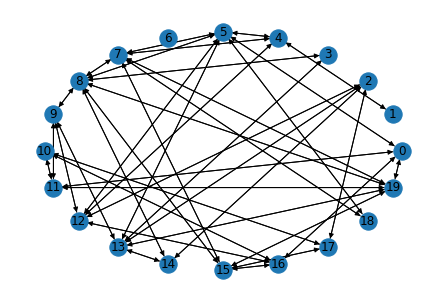

In [3]:
import networkx as nx

n = 20
m = 40
#generar grafo como lista de listas
grafo = generarGrafoAleatorio(n,m)
print(grafo)
#crear grafo
G = nx.DiGraph()
#agregar nodos
for u in range(len(grafo)):
  G.add_node(u)
#agregar aristas
for u in range(len(grafo)):
  for v in grafo[u]:
    G.add_edge(u,v)
#plotear grafo con disposición circular
nx.draw_circular(G, with_labels=True)

In [4]:
from ortools.sat.python import cp_model

#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,n,'color_nodo_'+str(i)) for i in range(n)]
print(color)
#restricciones
for u in range(len(grafo)):
  for v in grafo[u]:
    model.Add(color[u] != color[v])

[color_nodo_0(1..20), color_nodo_1(1..20), color_nodo_2(1..20), color_nodo_3(1..20), color_nodo_4(1..20), color_nodo_5(1..20), color_nodo_6(1..20), color_nodo_7(1..20), color_nodo_8(1..20), color_nodo_9(1..20), color_nodo_10(1..20), color_nodo_11(1..20), color_nodo_12(1..20), color_nodo_13(1..20), color_nodo_14(1..20), color_nodo_15(1..20), color_nodo_16(1..20), color_nodo_17(1..20), color_nodo_18(1..20), color_nodo_19(1..20)]


In [5]:
#crear solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = [] #lista de colores asignados a los nodos
if status == cp_model.OPTIMAL:
  for u in range(len(grafo)):
    print("Nodo",u,'de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]

Nodo 0 de color 12
Nodo 1 de color 2
Nodo 2 de color 3
Nodo 3 de color 1
Nodo 4 de color 1
Nodo 5 de color 7
Nodo 6 de color 1
Nodo 7 de color 2
Nodo 8 de color 6
Nodo 9 de color 5
Nodo 10 de color 10
Nodo 11 de color 11
Nodo 12 de color 8
Nodo 13 de color 4
Nodo 14 de color 5
Nodo 15 de color 1
Nodo 16 de color 9
Nodo 17 de color 2
Nodo 18 de color 8
Nodo 19 de color 13


[(0.21883340461400957, 0.8038990989244438, 0.44835276222931975), (0.42174254983475, 0.3022473881239285, 0.6329157184755472), (0.42417883125503664, 0.213143223235156, 0.5529001160957994), (0.6300613298401603, 0.4325675664921069, 0.2792342146146206), (0.7343634253394548, 0.886868242146097, 0.8448288802910927), (0.07248790641133629, 0.24342391945296904, 0.8934363236012312), (0.6465913747426747, 0.4475104157471348, 0.2758645984474708), (0.9841590597595912, 0.72652572524839, 0.8614183554528438), (0.13146307676631286, 0.6094794868223865, 0.5316599943157425), (0.4583354112740866, 0.6351570207413882, 0.03737179561789139), (0.47342666511577525, 0.8942725478192166, 0.26195051738794994), (0.7457050471608311, 0.2937554645476217, 0.7884607047132297), (0.03403848005859855, 0.2141827137418465, 0.6237474407113106), (0.6126814660536614, 0.8730973697028049, 0.280321802519821), (0.616153199820583, 0.07737996898520272, 0.8029871034248155), (0.6300014210283621, 0.808886873292119, 0.4933088586008587), (0.58

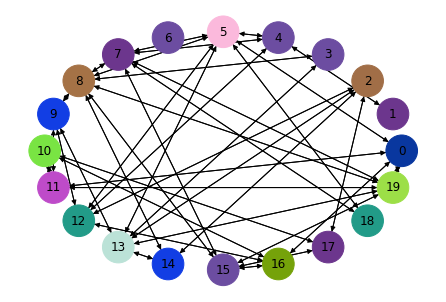

In [6]:
colors = [(random(),random(),random()) for i in range(n)]
print(colors)

G1 = nx.DiGraph()
for u in range(len(grafo)):
  G1.add_node(u)
for u in range(len(grafo)):
  for v in grafo[u]:
    G1.add_edge(u,v)

nx.draw_circular(G1, with_labels=True, node_color=[colors[x] for x in c], node_size=1000)

[[27, 49, 35, 26, 22, 44], [35, 11, 43, 10, 20, 27, 31, 39, 41], [37, 34, 3, 21, 5, 43, 38, 16, 17], [14, 18, 33, 2, 38, 4, 8, 35], [35, 3, 16, 6, 34, 29, 40, 17], [46, 34, 18, 2, 33, 12, 41], [42, 25, 7, 4], [10, 6, 13], [17, 39, 3, 38, 24, 30], [24, 27, 48, 15, 28, 49, 47, 33, 19, 37], [34, 12, 7, 49, 1, 14, 35], [48, 49, 13, 1, 18, 43, 29, 46, 21], [31, 20, 10, 46, 28, 30, 5, 21, 34, 18], [46, 23, 11, 30, 42, 26, 15, 19, 45, 7], [3, 26, 37, 17, 10, 31], [40, 20, 49, 9, 27, 46, 13, 23], [24, 21, 32, 4, 38, 29, 2], [8, 28, 40, 33, 23, 46, 14, 19, 43, 39, 4, 2], [3, 28, 5, 11, 33, 36, 12], [26, 49, 25, 28, 9, 43, 13, 17], [12, 15, 35, 1, 25], [31, 16, 2, 24, 33, 11, 30, 12, 36], [25, 36, 0, 33], [13, 17, 46, 47, 15], [16, 9, 21, 48, 8, 39], [22, 6, 48, 33, 30, 19, 40, 20, 31, 43], [19, 40, 14, 36, 13, 0, 45], [34, 9, 41, 29, 0, 15, 1, 43, 44], [18, 17, 9, 19, 12, 39, 37], [41, 48, 30, 27, 43, 11, 36, 16, 4, 45], [49, 46, 29, 34, 13, 25, 45, 12, 21, 40, 8, 37], [21, 12, 44, 1, 36, 25, 1

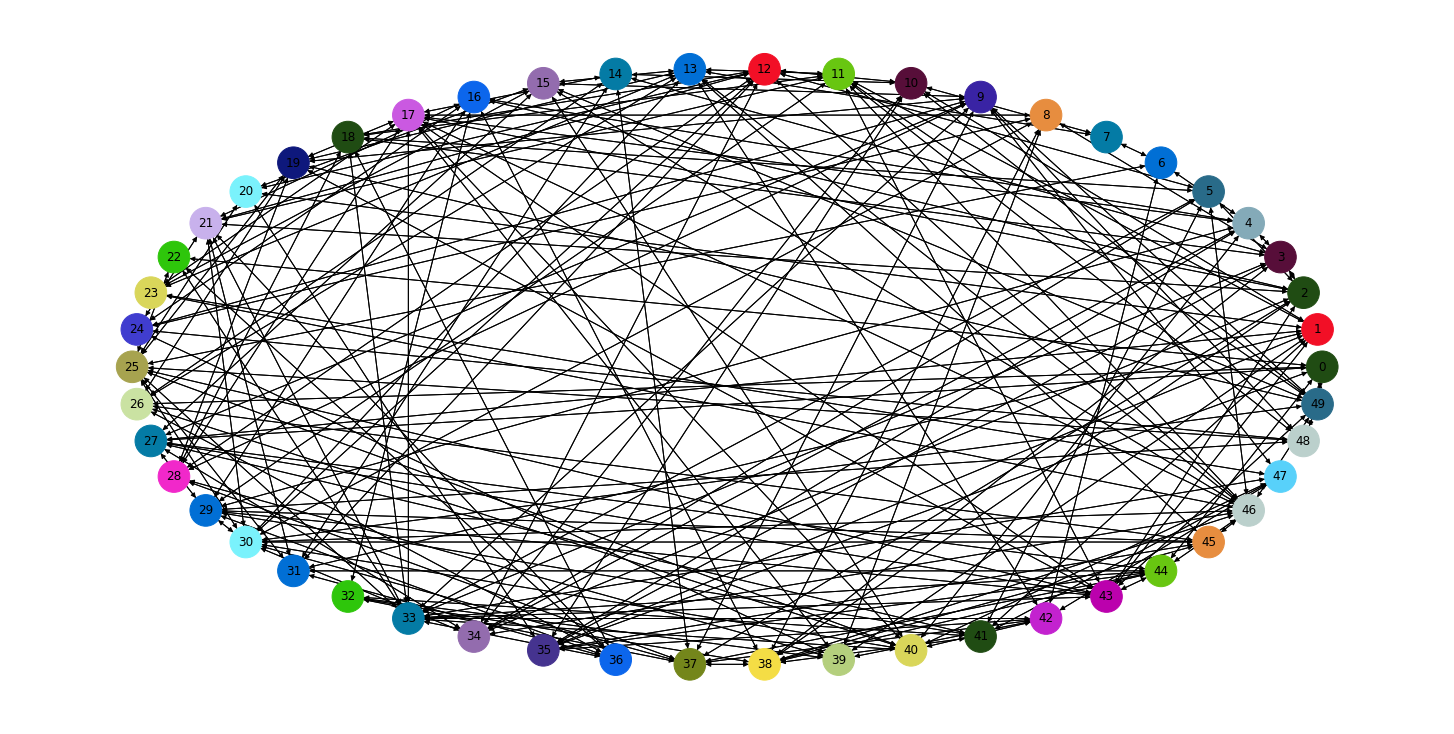

In [7]:
import matplotlib.pyplot as plt

n = 50
m = 200
#generar grafo como lista de listas
grafo = generarGrafoAleatorio(n,m)
print(grafo)
#crear grafo
G = nx.DiGraph()
#agregar nodos
for u in range(len(grafo)):
  G.add_node(u)
#agregar aristas
for u in range(len(grafo)):
  for v in grafo[u]:
    G.add_edge(u,v)
  
#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,n,'color_nodo_'+str(i)) for i in range(n)]
print(color)
#restricciones
for u in range(len(grafo)):
  for v in grafo[u]:
    model.Add(color[u] != color[v])
#crear solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = [] #lista de colores asignados a los nodos
if status == cp_model.OPTIMAL:
  for u in range(len(grafo)):
    #print("Nodo",u,'de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]

colors = [(random(),random(),random()) for i in range(n)]
print(colors)

G1 = nx.DiGraph()
for u in range(len(grafo)):
  G1.add_node(u)
for u in range(len(grafo)):
  for v in grafo[u]:
    G1.add_edge(u,v)

plt.figure(figsize=(20,10))
nx.draw_circular(G1, with_labels=True, node_color=[colors[x] for x in c], node_size=1000)

In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [11]:
url_data = 'https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson'

In [12]:
region_geojson = gpd.read_file(url_data)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


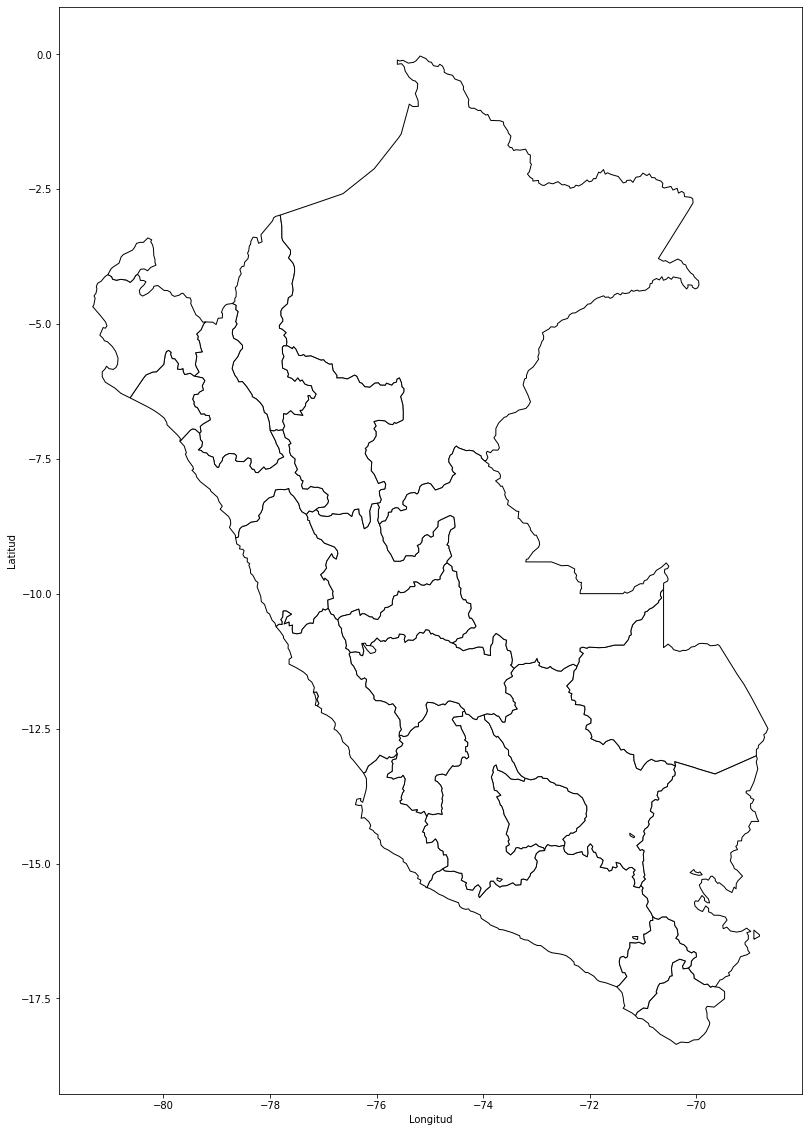

In [13]:
from matplotlib.colors import ListedColormap

#lista de 25 colores en blanco
cmap = ListedColormap(['white' for _ in range(25)],name='test')

#plotear la figura con esa lista y lineas de color negro
region_geojson.plot(figsize=(20,20),edgecolor='black',cmap=cmap)
#etiquetas de la figura
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [14]:
regiones = list(region_geojson['NOMBDEP'].values)
print(regiones)

['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO', 'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO', 'ICA', 'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO', 'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO', 'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI']


In [15]:
grafo_regional = [[15,21,12,5],[12,9,14],[7,3,4],
                  [17,20,7,2,4,10],[11,8,10,7,2,3],[19,13,12,0],
                  [14],[24,16,20,3,2,4,11],[10,14,11,4,3],
                  [1,12,21,24,18,14,15],[14,8,4,3],[14,18,24,7,4,8],
                  [13,5,0,21,9,1],[19,5,12],[1,9,18,11,8,10,6],
                  [0,21,24,9],[24,20,7],[3,20,22],
                  [9,14,24,11],[23,13,5],[7,16,17,22,3],
                  [0,15,24,9,1,12],[17,20],[19],[15,9,18,11,7,16]]
for u in range(len(grafo_regional)):
  print(regiones[u],[regiones[v] for v in grafo_regional[u]])

AMAZONAS ['LORETO', 'SAN MARTIN', 'LA LIBERTAD', 'CAJAMARCA']
ANCASH ['LA LIBERTAD', 'HUANUCO', 'LIMA']
APURIMAC ['CUSCO', 'AREQUIPA', 'AYACUCHO']
AREQUIPA ['MOQUEGUA', 'PUNO', 'CUSCO', 'APURIMAC', 'AYACUCHO', 'ICA']
AYACUCHO ['JUNIN', 'HUANCAVELICA', 'ICA', 'CUSCO', 'APURIMAC', 'AREQUIPA']
CAJAMARCA ['PIURA', 'LAMBAYEQUE', 'LA LIBERTAD', 'AMAZONAS']
CALLAO ['LIMA']
CUSCO ['UCAYALI', 'MADRE DE DIOS', 'PUNO', 'AREQUIPA', 'APURIMAC', 'AYACUCHO', 'JUNIN']
HUANCAVELICA ['ICA', 'LIMA', 'JUNIN', 'AYACUCHO', 'AREQUIPA']
HUANUCO ['ANCASH', 'LA LIBERTAD', 'SAN MARTIN', 'UCAYALI', 'PASCO', 'LIMA', 'LORETO']
ICA ['LIMA', 'HUANCAVELICA', 'AYACUCHO', 'AREQUIPA']
JUNIN ['LIMA', 'PASCO', 'UCAYALI', 'CUSCO', 'AYACUCHO', 'HUANCAVELICA']
LA LIBERTAD ['LAMBAYEQUE', 'CAJAMARCA', 'AMAZONAS', 'SAN MARTIN', 'HUANUCO', 'ANCASH']
LAMBAYEQUE ['PIURA', 'CAJAMARCA', 'LA LIBERTAD']
LIMA ['ANCASH', 'HUANUCO', 'PASCO', 'JUNIN', 'HUANCAVELICA', 'ICA', 'CALLAO']
LORETO ['AMAZONAS', 'SAN MARTIN', 'UCAYALI', 'HUANUCO']


In [16]:
#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,25,'color_region_'+str(i)) for i in range(25)]
#restricciones
for u in range(len(grafo_regional)):
  for v in grafo_regional[u]:
    model.Add(color[u] != color[v])

In [17]:
#crear solver 
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = []
if status == cp_model.OPTIMAL:
  for u in range(len(grafo_regional)):
    print('Region',u,'(',regiones[u],')','de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]

Region 0 ( AMAZONAS ) de color 15
Region 1 ( ANCASH ) de color 3
Region 2 ( APURIMAC ) de color 3
Region 3 ( AREQUIPA ) de color 5
Region 4 ( AYACUCHO ) de color 1
Region 5 ( CAJAMARCA ) de color 1
Region 6 ( CALLAO ) de color 1
Region 7 ( CUSCO ) de color 2
Region 8 ( HUANCAVELICA ) de color 7
Region 9 ( HUANUCO ) de color 12
Region 10 ( ICA ) de color 6
Region 11 ( JUNIN ) de color 10
Region 12 ( LA LIBERTAD ) de color 2
Region 13 ( LAMBAYEQUE ) de color 3
Region 14 ( LIMA ) de color 8
Region 15 ( LORETO ) de color 13
Region 16 ( MADRE DE DIOS ) de color 3
Region 17 ( MOQUEGUA ) de color 1
Region 18 ( PASCO ) de color 9
Region 19 ( PIURA ) de color 4
Region 20 ( PUNO ) de color 4
Region 21 ( SAN MARTIN ) de color 14
Region 22 ( TACNA ) de color 5
Region 23 ( TUMBES ) de color 5
Region 24 ( UCAYALI ) de color 11


Hay 25 regiones con colores: [15, 3, 3, 5, 1, 1, 1, 2, 7, 12, 6, 10, 2, 3, 8, 13, 3, 1, 9, 4, 4, 14, 5, 5, 11]
Hay 15 colores únicos: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


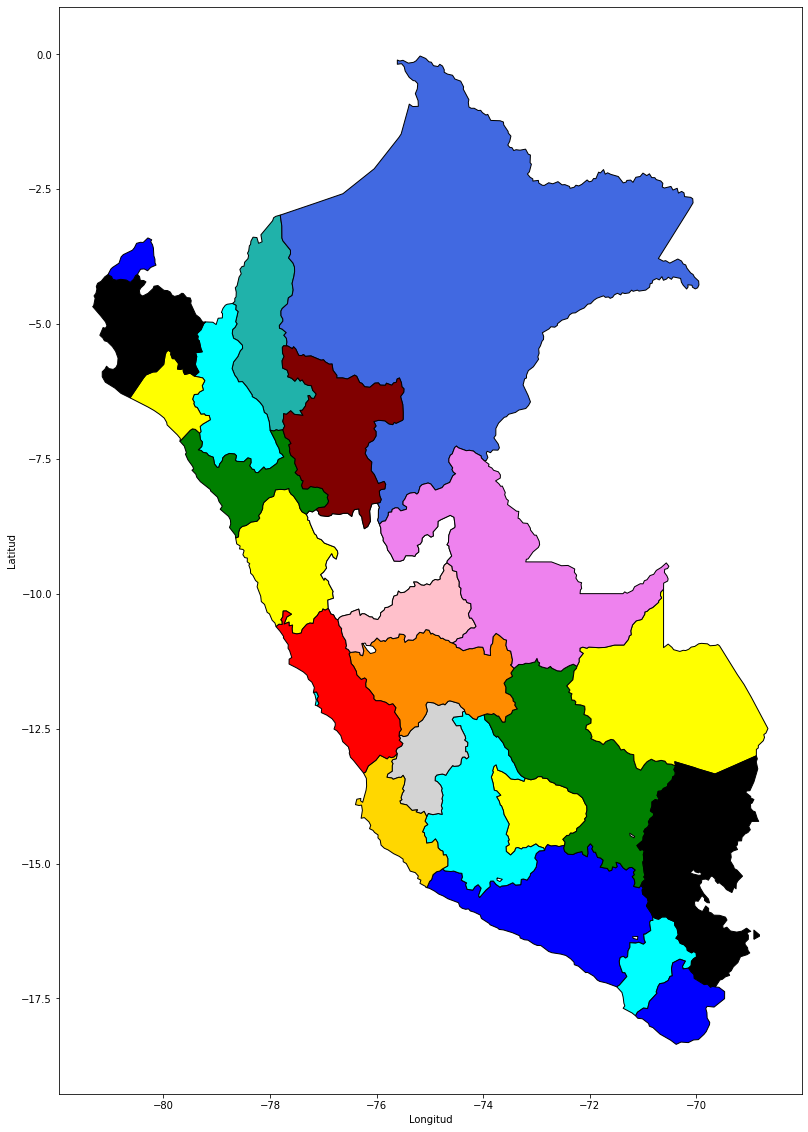

In [18]:
#imprimir cantidad de colores
print('Hay',len(c),'regiones con colores:',c)
print('Hay',len(set(c)),'colores únicos:',set(c))
#plotear
colors_regiones = ['','cyan','green','yellow','black',
                   'blue','gold','lightgray','red',
                   'pink','darkorange','violet','white',
                   'royalblue','maroon','lightseagreen']

cmap = ListedColormap([colors_regiones[c[i]] for i in range(25)],name='regions')
region_geojson.plot(figsize=(20,20),edgecolor='black',cmap=cmap)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [19]:
#crear CSP
model = cp_model.CpModel()
#variables y dominios
#color = [model.NewIntVar(1,25,'color_region_'+str(i)) for i in range(25)]

nc = []
for i in range(25):
  fila = []
  for j in range(25):
    fila += [model.NewBoolVar('color_'+str(i)+'_'+str(j))]
  nc += [fila]
print(nc)

usocolor = []
for j in range(25):
  usocolor += [model.NewBoolVar('usocolor'+str(j))]
  col = [nc[i][j] for i in range(25)]
  model.Add(sum(col) > 0).OnlyEnforceIf(usocolor[j])
  model.Add(sum(col) == 0).OnlyEnforceIf(usocolor[j].Not())

numerocolores = model.NewIntVar(1,25,'numerocolores')
model.Add(sum(usocolor) == numerocolores)

color = []
for i in range(25):  
  color += [model.NewIntVar(1,25,'color_region_'+str(i))]
  for j in range(25):
    model.Add(color[i] == j+1).OnlyEnforceIf(nc[i][j])
    model.Add(color[i] != j+1).OnlyEnforceIf(nc[i][j].Not())

#restricciones
for u in range(len(grafo_regional)):
  for v in grafo_regional[u]:
    model.Add(color[u] != color[v])    

#función objetivo
model.Minimize(numerocolores)

[[color_0_0(0..1), color_0_1(0..1), color_0_2(0..1), color_0_3(0..1), color_0_4(0..1), color_0_5(0..1), color_0_6(0..1), color_0_7(0..1), color_0_8(0..1), color_0_9(0..1), color_0_10(0..1), color_0_11(0..1), color_0_12(0..1), color_0_13(0..1), color_0_14(0..1), color_0_15(0..1), color_0_16(0..1), color_0_17(0..1), color_0_18(0..1), color_0_19(0..1), color_0_20(0..1), color_0_21(0..1), color_0_22(0..1), color_0_23(0..1), color_0_24(0..1)], [color_1_0(0..1), color_1_1(0..1), color_1_2(0..1), color_1_3(0..1), color_1_4(0..1), color_1_5(0..1), color_1_6(0..1), color_1_7(0..1), color_1_8(0..1), color_1_9(0..1), color_1_10(0..1), color_1_11(0..1), color_1_12(0..1), color_1_13(0..1), color_1_14(0..1), color_1_15(0..1), color_1_16(0..1), color_1_17(0..1), color_1_18(0..1), color_1_19(0..1), color_1_20(0..1), color_1_21(0..1), color_1_22(0..1), color_1_23(0..1), color_1_24(0..1)], [color_2_0(0..1), color_2_1(0..1), color_2_2(0..1), color_2_3(0..1), color_2_4(0..1), color_2_5(0..1), color_2_6(0.

In [20]:
#crear solver 
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = []
if status == cp_model.OPTIMAL:
  print("El número de colores es",solver.Value(numerocolores))
  for i in range(len(grafo_regional)):
    for j in range(len(grafo_regional)):
      print(solver.Value(nc[i][j]),end=' ')
    print()
  print()
  for i in range(len(grafo_regional)):
    print(solver.Value(usocolor[i]),end=' ')
  print()
  for u in range(len(grafo_regional)):
    print('Region',u,'(',regiones[u],')','de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]

El número de colores es 4
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
0 0 0

Hay 25 regiones con colores: [17, 2, 20, 17, 21, 20, 17, 2, 2, 17, 20, 17, 21, 2, 21, 2, 17, 2, 20, 21, 20, 20, 21, 20, 21]
Hay 4 colores únicos: {17, 2, 20, 21}


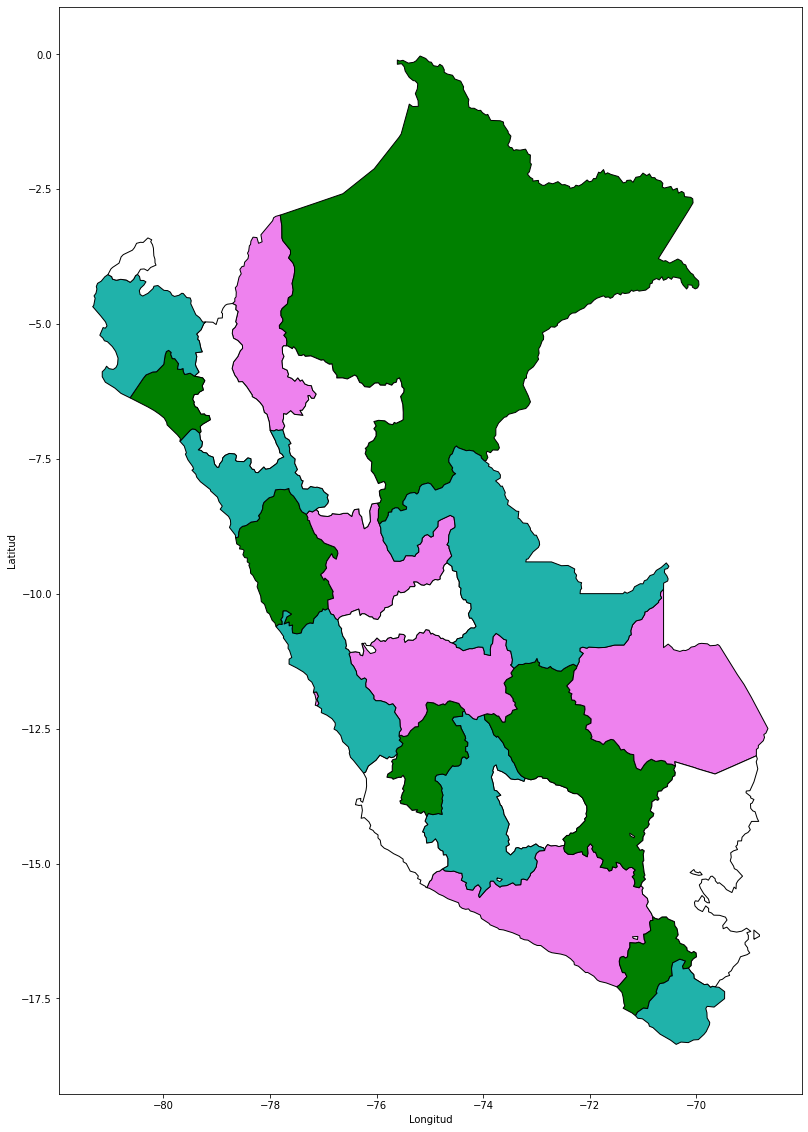

In [21]:
#imprimir cantidad de colores
print('Hay',len(c),'regiones con colores:',c)
print('Hay',len(set(c)),'colores únicos:',set(c))
#plotear
colors_regiones = ['','cyan','green','yellow','black',
                   'blue','gold','lightgray','red',
                   'pink','darkorange','violet','white',
                   'royalblue','maroon','lightseagreen',
                   'royalblue','violet','lightseagreen',
                   'royalblue','white','lightseagreen']

cmap = ListedColormap([colors_regiones[c[i]] for i in range(25)],name='regions')
region_geojson.plot(figsize=(20,20),edgecolor='black',cmap=cmap)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()